# Imports

In [1]:
pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 53.5 MB/s eta 0:00:00


In [2]:
import requests
import json
import xarray as xr
import datetime
from ipywidgets import interact, widgets, interactive
from IPython.display import display
import pandas as pd
import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
pd.set_option('display.max_columns', None)

# VIS data

In [3]:
VIS_body = {
        "query_parameters": [
            {
                "column_name": 'measuredvalue',
                "alias": 'numeriekewaarde'
            },
            # {
            #     "column_name": 'parameter',
            #     "alias": 'parameter'
            # },
            {
                "column_name": 'Species',
                "alias": 'Species'
            },
            {
                "column_name": "measuredunit",
                "alias": "measuredunit"
            },
            # {
            #     "column_name": "parametertype",
            #     "alias": "parametertype"
            # },
            {
                "column_name": "quantity",
                "alias": "grootheid_code"
            },
            {
                "column_name": "collectiondate",
                "alias": "resultaatdatum"
            },
            {
                "column_name": "longitude",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "latitude",
                "alias": "LATITUDE"
            },
            # {
            #     "column_name": "wmr_area_code",
            #     "alias": "wmr_area_code"
            # },
            # {
            #     "column_name": "wkt",
            #     "alias": "wkt"
            # },
            {
                "column_name": "wmr_waterbody_krw",
                "alias": "wmr_waterbody_krw"
            },
            # {
            #     "column_name": "aggregate",
            #     "alias": "aggregate"
            # },
            # {
            #     "column_name": "changedate",
            #     "alias": "changedate"
            # },
            # {
            #     "column_name": "compartment",
            #     "alias": "compartment"
            # },
            # {
            #     "column_name": "ctd_update",
            #     "alias": "ctd_update"
            # },
            # {
            #     "column_name": "calculatedunit",
            #     "alias": "calculatedunit"
            # },
            # {
            #     "column_name": "calculatedvalue",
            #     "alias": "calculatedvalue"
            # },
            # {
            #     "column_name": "measurementsetnumber",
            #     "alias": "measurementsetnumber"
            # },
            # {
            #     "column_name": "samplingdevice",
            #     "alias": "samplingdevice"
            # },
            # {
            #     "column_name": "organisation",
            #     "alias": "organisation"
            # },
            # {
            #     "column_name": "sourcesystem",
            #     "alias": "sourcesystem"
            # },
            # {
            #     "column_name": "status",
            #     "alias": "status"
            # },
            # {
            #     "column_name": "taxontype",
            #     "alias": "taxontype"
            # },
            # {
            #     "column_name": "id",
            #     "alias": "id"
            # },
            {
                "column_name": "AphiaID",
                "alias": "AphiaID"
            },
            # {
            #     "column_name": "AphiaID_accepted",
            #     "alias": "AphiaID_accepted"
            # }
            ],
            "filters": [
            {
              "for_query_parameter": "grootheid_code",
              "eq": "AANTL"
            },
            {
              "for_query_parameter": "LONGITUDE",
              "min": 3,
              "max": 7
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 50,
              "max": 54
            }
            ],
            "output": {
                "format": "csv"
        }}

# ["Authority",  "Authority_accepted",  "Class",  "Family",  "Genus",  "Kingdom",  "LSID",  "Match type",  "Order",  "Phylum",  "Qualitystatus",  "ScientificName",  "ScientificName_accepted",  "Subgenus",  "Subspecies",  "TSN",  "Taxon status",
#   "geom",  "id",  "isBrackish",  "isFresh",  "isMarine",  "isTerrestrial",]

In [4]:
VIS_response = requests.post("https://beacon-poc-vis-monitoring.maris.nl/api/query", json.dumps(VIS_body), headers = {
    'Content-type': 'application/json'
})
open('./Vis.csv', 'wb').write(VIS_response.content)
df_VIS = pd.read_csv('Vis.csv')
df_VIS

,numeriekewaarde,Species,measuredunit,grootheid_code,resultaatdatum,LONGITUDE,LATITUDE,wmr_waterbody_krw,AphiaID,dataset_id
0,2.0,cernua,n,AANTL,2009-03-10,5.93038,51.97057,"Nederrijn, Lek",405451.0,1
1,1.0,lucioperca,n,AANTL,2009-03-10,5.93038,51.97057,"Nederrijn, Lek",151308.0,1
2,1.0,lucioperca,n,AANTL,2009-03-10,5.93038,51.97057,"Nederrijn, Lek",151308.0,1
3,1.0,lucioperca,n,AANTL,2009-03-10,5.93038,51.97057,"Nederrijn, Lek",151308.0,1
4,1.0,lucioperca,n,AANTL,2009-03-10,5.93038,51.97057,"Nederrijn, Lek",151308.0,1
...,...,...,...,...,...,...,...,...,...,...
460105,3.0,eperlanus,n,AANTL,2000-11-22,5.15000,52.59583,Markermeer,126736.0,1
460106,1.0,eperlanus,n,AANTL,2000-11-22,5.15000,52.59583,Markermeer,126736.0,1
460107,2.0,eperlanus,n,AANTL,2000-11-22,5.15000,52.59583,Markermeer,126736.0,1
460108,3.0,eperlanus,n,AANTL,2000-11-22,5.15000,52.59583,Markermeer,126736.0,1


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downlo

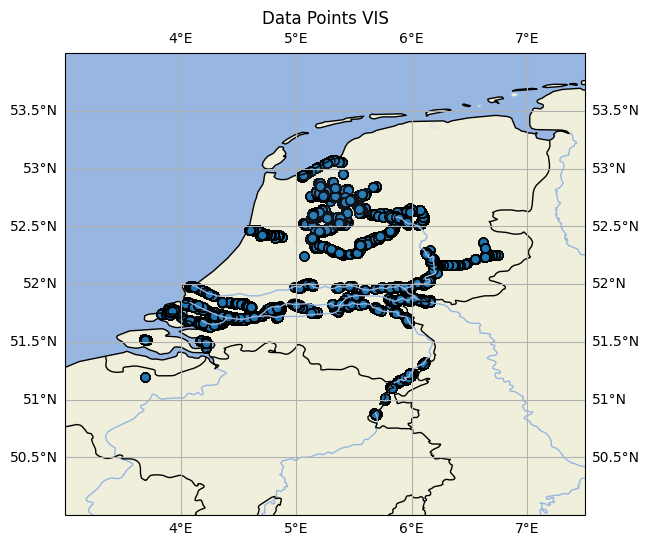

In [5]:
# Create a Cartopy plot
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([3, 7.5, 50, 54], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(df_VIS['LONGITUDE'], df_VIS['LATITUDE'], s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# #
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a title
plt.title('Data Points VIS')

# Show the plot
plt.show()

# Aquadesk data

In [6]:
Aquadesk_noordzee_body = {
        "query_parameters": [
            {
                "column_name": "Waarde_Gemeten",
                "alias": "Waarde_Gemeten"
            },
            {
                "column_name": "Waarde_Berekend",
                "alias": "numeriekewaarde"
            },
            {
                "column_name": "Species",
                "alias": "Species"
            },
            {
                "column_name": "latitude",
                "alias": "LATITUDE"
            },
            {
                "column_name": "longitude",
                "alias": "LONGITUDE"
            },
            {
                "column_name": "Grootheid_Code",
                "alias": "Grootheid_Code"
            },
            {
                "column_name": 'Meting_DatumTijd',
                "alias": 'resultaatdatum'
            },
            # {
            #     "column_name": "Collectie_DatumTijd",
            #     "alias": "monsternemingsdatum"
            # },
            # {
            #     "column_name": "Parameter_Type",
            #     "alias": "Parameter_Type"
            # },
            # {
            #     "column_name": "Subspecies",
            #     "alias": "Subspecies"
            # },
            # {
            #     "column_name": "Subgenus",
            #     "alias": "Subgenus"
            # },
            # {
            #     "column_name": "Compartiment_Code",
            #     "alias": "Compartiment_Code"
            # },
            # {
            #     "column_name": "Classificatie_Code",
            #     "alias": "Classificatie_Code"
            # },
            {
                "column_name": "Eenheid_Gemeten",
                "alias": "Eenheid_Gemetene"
            },
            {
                "column_name": "Eenheid_Berekend",
                "alias": "Eenheid_Berekend"
            },
            # {
            #     "column_name": "Meetobject_Code",
            #     "alias": "Meetobject_Code"
            # },
            # {
            #     "column_name": "Parameter_Specificatie",
            #     "alias": "Parameter_Specificatie"
            # },
            # {
            #     "column_name": "Parameter_Kenmerken",
            #     "alias": "Parameter_Kenmerken"
            # },
            # {
            #     "column_name": "Collectie_Referentie",
            #     "alias": "Collectie_Referentie"
            # },
            # {
            #     "column_name": "Doelstelling_Code",
            #     "alias": "Doelstelling_Code"
            # },
            # {
            #     "column_name": "Ecotoop_Codes",
            #     "alias": "Ecotoop_Codes"
            # },
            # {
            #     "column_name": "Geografie_Datum",
            #     "alias": "Geografie_Datum"
            # },
            # {
            #     "column_name": "Geografie_Vorm",
            #     "alias": "Geografie_Vorm"
            # },
            # {
            #     "column_name": "Geografie_Notatie",
            #     "alias": "Geografie_Notatie"
            # },
            # {
            #     "column_name": "Limiet_Symbool",
            #     "alias": "Limiet_Symbool"
            # },
            # {
            #     "column_name": "Meetpakket_Code",
            #     "alias": "Meetpakket_Code"
            # },
            # {
            #     "column_name": "Meetset_Nummer",
            #     "alias": "Meetset_Nummer"
            # },
            # {
            #     "column_name": "Meting_Correlatie",
            #     "alias": "Meting_Correlatie"
            # },
            # {
            #     "column_name": "Notitie_Code",
            #     "alias": "Notitie_Code"
            # },
            # {
            #     "column_name": "Notitie_Tekst",
            #     "alias": "Notitie_Tekst"
            # },
            # {
            #     "column_name": "Organisatie_Codes",
            #     "alias": "Organisatie_Codes"
            # },
            # {
            #     "column_name": "Proces_Instantie_Codes",
            #     "alias": "Proces_Instantie_Codes"
            # },
            # {
            #     "column_name": "Project_Code",
            #     "alias": "Project_Code"
            # },
            # {
            #     "column_name": "Status_Code",
            #     "alias": "Status_Code"
            # },
            # {
            #     "column_name": "Verrichting_Methoden",
            #     "alias": "Verrichting_Methoden"
            # }
            ],
            "filters": [
            {
              "for_query_parameter": "Grootheid_Code",
              "eq": "AANTPOPVTE"
            },
            {
              "for_query_parameter": "LONGITUDE",
              "min": 3,
              "max": 7
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 50,
              "max": 54
            }
            ],
            "output": {
                "format": "csv"
        }}

In [7]:
Aquadesk_noordzee_response = requests.post("https://beacon-poc-aquadesk-noordzee.maris.nl/api/query", json.dumps(Aquadesk_noordzee_body), headers = {
    'Content-type': 'application/json'
})
open('./Aquadesk_noordzee.csv', 'wb').write(Aquadesk_noordzee_response.content)
df_Aquadesk_noordzee = pd.read_csv('Aquadesk_noordzee.csv', low_memory=False)
df_Aquadesk_noordzee

,Waarde_Gemeten,numeriekewaarde,Species,LATITUDE,LONGITUDE,Grootheid_Code,resultaatdatum,Eenheid_Gemetene,Eenheid_Berekend,dataset_id
0,20.0,0.136,rubens,53.995185,3.10510,AANTPOPVTE,\t01-07-2015 11:20:30,n,n/m2,1
1,9.0,0.061,irregularis,53.995185,3.10510,AANTPOPVTE,\t01-07-2015 11:20:30,n,n/m2,1
2,1.0,0.007,NaN,53.995185,3.10510,AANTPOPVTE,\t01-07-2015 11:20:30,n,n/m2,1
3,2.0,0.014,NaN,53.995185,3.10510,AANTPOPVTE,\t01-07-2015 11:20:30,n,n/m2,1
4,7.0,0.047,NaN,53.995185,3.10510,AANTPOPVTE,\t01-07-2015 11:20:30,n,n/m2,1
...,...,...,...,...,...,...,...,...,...,...
189651,1.0,63.694,balthica,51.390670,4.07477,AANTPOPVTE,\t03-07-2023 03:51:32,n,n/m2,1
189652,1.0,63.694,NaN,51.390670,4.07477,AANTPOPVTE,\t03-07-2023 03:52:33,n,n/m2,1
189653,1.0,63.694,NaN,51.390670,4.07477,AANTPOPVTE,\t03-07-2023 03:52:54,n,n/m2,1
189654,2.0,127.389,tenuis,51.390670,4.07477,AANTPOPVTE,\t03-07-2023 03:57:10,n,n/m2,1


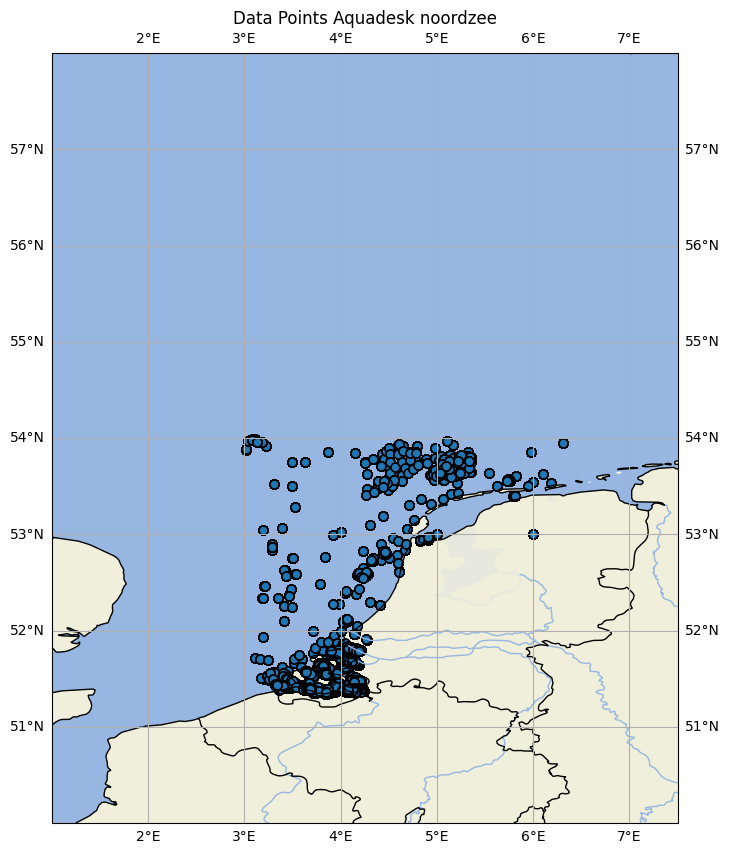

In [8]:
# Create a Cartopy plot
fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([1, 7.5, 50, 58], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(df_Aquadesk_noordzee['LONGITUDE'], df_Aquadesk_noordzee['LATITUDE'], s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# #
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a title
plt.title('Data Points Aquadesk noordzee')

# Show the plot
plt.show()

# WMR Data

In [9]:
WMR_body = {
        "query_parameters": [
            {
                "column_name": "numeriekewaarde",
                "alias": "numeriekewaarde"
            },
            {
                "column_name": "resultaatdatum",
                "alias": "resultaatdatum"
            },
            {
                "column_name": "Species",
                "alias": "Species"
            },
            {
                "column_name": "latitude",
                "alias": "LATITUDE"
            },
            {
                "column_name": "longitude",
                "alias": "LONGITUDE"
            },
            {
                "column_name": 'eenheid_code',
                "alias": 'eenheid_code'
            },
            # {
            #     "column_name": "monsternemingsdatum",
            #     "alias": "monsternemingsdatum"
            # },
            # {
            #     "column_name": "hoedanigheid_code",
            #     "alias": "hoedanigheid_code"
            # },
            {
                "column_name": "grootheid_code",
                "alias": "grootheid_code"
            },
            # {
            #     "column_name": "parameter_groep",
            #     "alias": "parameter_groep"
            # },
            # {
            #     "column_name": "parameter_omschrijving",
            #     "alias": "parameter_omschrijving"
            # },
            {
                "column_name": "bemonsteringsmethode_code",
                "alias": "bemonsteringsmethode_code"
            },
            {
                "column_name": "monsternemingstijd",
                "alias": "monsternemingstijd"
            },
            {
                "column_name": "bemonsteringsapparaat_code",
                "alias": "bemonsteringsapparaat_code"
            },
            # {
            #     "column_name": "wmr_datagroup_m",
            #     "alias": "wmr_datagroup_m"
            # },
            # {
            #     "column_name": "wmr_datagroup_t",
            #     "alias": "wmr_datagroup_t"
            # },
            # {
            #     "column_name": "begindatum",
            #     "alias": "begindatum"
            # },
            # {
            #     "column_name": "begintijd",
            #     "alias": "begintijd"
            # },
            # {
            #     "column_name": "FID",
            #     "alias": "FID"
            # },
            # {
            #     "column_name": "bemonsteringsapparaat_codespace",
            #     "alias": "bemonsteringsapparaat_codespace"
            # },
            # {
            #     "column_name": "bemonsteringsmethode_codespace",
            #     "alias": "bemonsteringsmethode_codespace"
            # },
            # {
            #     "column_name": "compartiment_code",
            #     "alias": "compartiment_code"
            # },
            # {
            #     "column_name": "einddatum",
            #     "alias": "einddatum"
            # },
            # {
            #     "column_name": "geometriepunt_x",
            #     "alias": "geometriepunt_x"
            # },
            # {
            #     "column_name": "geometriepunt_y",
            #     "alias": "geometriepunt_y"
            # },
            # {
            #     "column_name": "kwaliteitsoordeel_code",
            #     "alias": "kwaliteitsoordeel_code"
            # },
            # {
            #     "column_name": "ident_m",
            #     "alias": "ident_m"
            # },
            # {
            #     "column_name": "ident_t",
            #     "alias": "ident_t"
            # },
            # {
            #     "column_name": "meetpunt_identificatie",
            #     "alias": "meetpunt_identificatie"
            # },
            # {
            #     "column_name": "referentiehorizontaal_code",
            #     "alias": "referentiehorizontaal_code"
            # },
            # {
            #     "column_name": "waardebepalingsmethode_code",
            #     "alias": "waardebepalingsmethode_code"
            # },
            # {
            #     "column_name": "waardebepalingsmethode_codespace",
            #     "alias": "waardebepalingsmethode_codespace"
            # },
            # {
            #     "column_name": "waardebewerkingsmethode_code",
            #     "alias": "waardebewerkingsmethode_code"
            # },
            # {
            #     "column_name": "waardebewerkingsmethode_codespace",
            #     "alias": "waardebewerkingsmethode_codespace"
            # },
            # {
            #     "column_name": "wmr_aphia_m",
            #     "alias": "wmr_aphia_m"
            # },
            # {
            #     "column_name": "wmr_aphiaid_t",
            #     "alias": "wmr_aphiaid_t"
            # },
            {
                "column_name": "wmr_datacluster_m",
                "alias": "wmr_datacluster_m"
            },
            # {
            #     "column_name": "wmr_fcname",
            #     "alias": "wmr_fcname"
            # },
            # {
            #     "column_name": "wmr_giscode",
            #     "alias": "wmr_giscode"
            # },
            # {
            #     "column_name": "wmr_gisid",
            #     "alias": "wmr_gisid"
            # },
            # {
            #     "column_name": "wmr_point",
            #     "alias": "wmr_point"
            # },
            # {
            #     "column_name": "wmr_year_m",
            #     "alias": "wmr_year_m"
            # },
            # {
            #     "column_name": "wmr_year_t",
            #     "alias": "wmr_year_t"
            # },
            {
                "column_name": "AphiaID_accepted",
                "alias": "AphiaID"
            }],
            "filters": [
            {
              "for_query_parameter": "grootheid_code",
              "eq": "AANTPOPVTE"
            },
            {
              "for_query_parameter": "LONGITUDE",
              "min": 3,
              "max": 7
            },
            {
              "for_query_parameter": "LATITUDE",
              "min": 50,
              "max": 54
            }
            ],
            "output": {
                "format": "csv"
        }}

# "Authority","Authority_accepted",  "Biotaxon",  "Class",  "FID",  "Family",  "Genus",  "Kingdom",  "LSID",  "Match type",  "Order",  "Phylum",  "Qualitystatus",  "ScientificName",  "ScientificName_accepted".  "Subgenus",  "Subspecies",  "TSN",  "Taxon status"

In [10]:
WMR_response = requests.post("https://beacon-poc-wmr.maris.nl/api/query", json.dumps(WMR_body), headers = {
    'Content-type': 'application/json'
})
open('./WMR.csv', 'wb').write(WMR_response.content)
df_WMR = pd.read_csv('WMR.csv', low_memory=False)
df_WMR

,numeriekewaarde,resultaatdatum,Species,LATITUDE,LONGITUDE,eenheid_code,grootheid_code,bemonsteringsmethode_code,monsternemingstijd,bemonsteringsapparaat_code,wmr_datacluster_m,AphiaID,dataset_id
0,0.000,1993-06-20,NaN,51.575000,3.500000,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,12:00,Zuigkor,IHM-KRM,2.0,1
1,0.000,1993-06-20,NaN,51.583333,3.500000,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,12:00,Zuigkor,IHM-KRM,2.0,1
2,0.000,1993-06-20,NaN,51.591667,3.500000,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,12:00,Bodemschaaf,IHM-KRM,2.0,1
3,0.000,1993-06-20,NaN,51.600000,3.500000,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,12:00,Bodemschaaf,IHM-KRM,2.0,1
4,0.077,1993-06-20,NaN,51.608333,3.500000,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,12:00,Zuigkor,IHM-KRM,123574.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179372,12.755,2023-06-21,NaN,51.650000,3.583333,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,17:26,Bodemschaaf,IHM-KRM,138333.0,1
179373,0.709,2023-06-21,subtruncata,51.650000,3.583333,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,17:26,Bodemschaaf,IHM-KRM,140302.0,1
179374,0.406,2023-06-21,latipes,51.633333,3.583333,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,17:45,Zuigkor,IHM-KRM,107400.0,1
179375,0.349,2023-06-21,holsatus,51.616667,3.583333,n/m2,AANTPOPVTE,Perdon & Troost 2012. CVO rapport: 12.006,18:00,Zuigkor,IHM-KRM,1748246.0,1


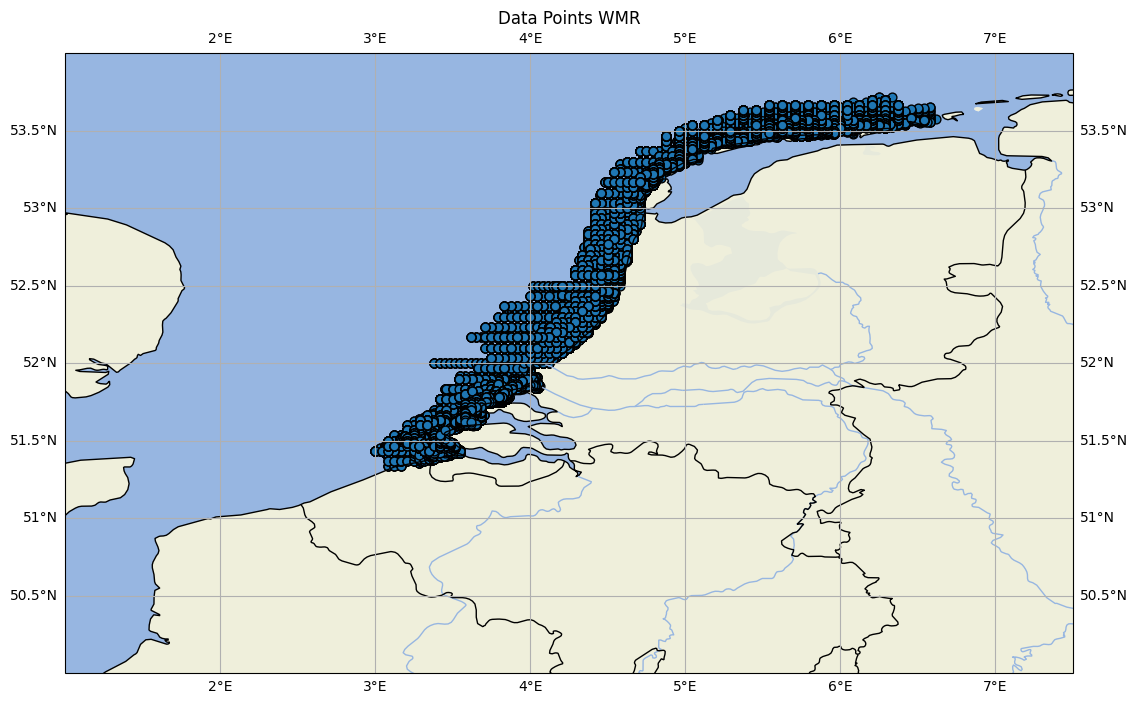

In [11]:
# Create a Cartopy plot
fig = plt.figure(figsize=(13, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

# Define the extent (bounding box) for the North Sea region
ax.set_extent([1, 7.5, 50, 54], crs=ccrs.PlateCarree())  # (west, east, south, north)

# Add coastlines and gridlines
ax.coastlines(resolution='10m')
ax.gridlines(draw_labels=True)

# Plot data points (latitude and longitude from the DataFrame)
sc = ax.scatter(df_WMR['LONGITUDE'], df_WMR['LATITUDE'], s=40, edgecolor='black', transform=ccrs.PlateCarree())

# Add land and ocean features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.RIVERS)     # Add rivers with color
ax.add_feature(cfeature.BORDERS)  # Add country borders# #
ax.add_feature(cfeature.LAKES, alpha=0.1)  # Add lakes with edge color

# Add a title
plt.title('Data Points WMR')

# Show the plot
plt.show()

# Analysis of query results

This part can be edited for specific queries. We have used 'species' as an example to demonstrate functionality. Parameters for the search and geographical boundaries can be set in the queries above. Make sure column names are similar to ensure proper join of results. You might have to go back and forth a few times to try out different query parameters.

In [20]:
# Generate counts per species in all datasets
value_counts1 = df_WMR['Species'].value_counts()
value_counts2 = df_Aquadesk_noordzee['Species'].value_counts()
value_counts3 = df_VIS['Species'].value_counts()

# Combine the value_counts results
combined_counts = value_counts1.add(value_counts2, fill_value=0).add(value_counts3, fill_value=0)

# Get the top 5 species with the most occurrences
top_5_species = combined_counts.sort_values(ascending=False).head(5)

# Function to count top species in each dataset
def count_top_species_in_datasets(top_species, *value_counts_list):
    results = {}
    for i, vc in enumerate(value_counts_list, start=1):
        count_in_dataset = {species: vc.get(species, 0) for species in top_species}
        results[f'Dataset {i}'] = count_in_dataset
    return results

# Get the counts of top 5 species in each dataset
top_species_list = top_5_species.index
dataset_counts = count_top_species_in_datasets(top_species_list, value_counts1, value_counts2, value_counts3)

# Print the results
print("Counts of top 5 species in each dataset:")
for dataset, counts in dataset_counts.items():
    print(f"\n{dataset}:")
    for species, count in counts.items():
        print(f"  {species}: {count}")

Counts of top 5 species in each dataset:

Dataset 1:
  anguilla: 0
  brama: 0
  rutilus: 0
  fluviatilis: 0
  cernua: 0

Dataset 2:
  anguilla: 0
  brama: 0
  rutilus: 0
  fluviatilis: 34
  cernua: 0

Dataset 3:
  anguilla: 100067
  brama: 56821
  rutilus: 42770
  fluviatilis: 36893
  cernua: 36052


In [21]:
# Find the intersection of species in all three datasets
common_species = value_counts1.index.intersection(value_counts2.index).intersection(value_counts3.index)

# Create a dictionary to store counts for each species
species_counts = {}

# For each common species, get the count from each dataset and total them
for species in common_species:
    count1 = value_counts1.get(species, 0)
    count2 = value_counts2.get(species, 0)
    count3 = value_counts3.get(species, 0)
    total_count = count1 + count2 + count3

    species_counts[species] = {
        'VIS': count1,
        'Aquadesk': count2,
        'WMR': count3,
        'Total': total_count
    }

# Print the results
print("Species present in all three datasets with their counts:")
for species, counts in species_counts.items():
    print(f"\n{species}:")
    for dataset, count in counts.items():
        print(f"  {dataset}: {count}")

Species present in all three datasets with their counts:

maenas:
  VIS: 3642
  Aquadesk: 734
  WMR: 2
  Total: 4378

reticulatus:
  VIS: 3431
  Aquadesk: 359
  WMR: 13
  Total: 3803

sinensis:
  VIS: 6
  Aquadesk: 2
  WMR: 333
  Total: 341


# Combined plots

In [30]:
# Function to filter and plot specific species with dataset-based coloring.

def plot_species_map(species_name):
    # Filter for the selected species
    filtered_df = combined_df[combined_df['Species'] == species_name]

    # Check if the species exists in the dataset
    if filtered_df.empty:
        print(f"No data available for species '{species_name}'.")
        return

    # Calculate adaptive extent based on the data points
    min_lon, max_lon = filtered_df['LONGITUDE'].min(), filtered_df['LONGITUDE'].max()
    min_lat, max_lat = filtered_df['LATITUDE'].min(), filtered_df['LATITUDE'].max()

    # Add some padding to the extent
    lon_padding = (max_lon - min_lon) * 0.1
    lat_padding = (max_lat - min_lat) * 0.1
    map_extent = [min_lon - lon_padding, max_lon + lon_padding,
                  min_lat - lat_padding, max_lat + lat_padding]

    # Define colors for each dataset
    dataset_colors = {'Dataset VIS': 'red', 'Dataset Aquadesk': 'blue', 'Dataset WMR': 'green'}

    # Create the plot
    fig = plt.figure(figsize=(13, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent(map_extent, crs=ccrs.PlateCarree())

    # Add features to the map
    ax.coastlines(resolution='10m')
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue')
    ax.add_feature(cfeature.RIVERS, edgecolor='blue')
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.LAKES, alpha=0.3)

    # Plot data points for the selected species, colored by dataset
    for dataset, color in dataset_colors.items():
        dataset_df = filtered_df[filtered_df['dataset_id'] == dataset]
        ax.scatter(
            dataset_df['LONGITUDE'],
            dataset_df['LATITUDE'],
            s=40,
            c=color,
            edgecolor='black',
            transform=ccrs.PlateCarree(),
            label=dataset
        )

    # Add a legend
    plt.legend(loc='lower left', bbox_to_anchor=(1, 0), title="Datasets")

    # Add gridlines
    gridlines = ax.gridlines(draw_labels=True, linestyle='--', color='gray')
    gridlines.top_labels = False
    gridlines.right_labels = False

    # Add a title
    plt.title(f'Data Points for Species: {species_name}')

    # Show and save the plot
    plt.savefig(f'{species_name}_map.png', dpi=300)
    plt.show()

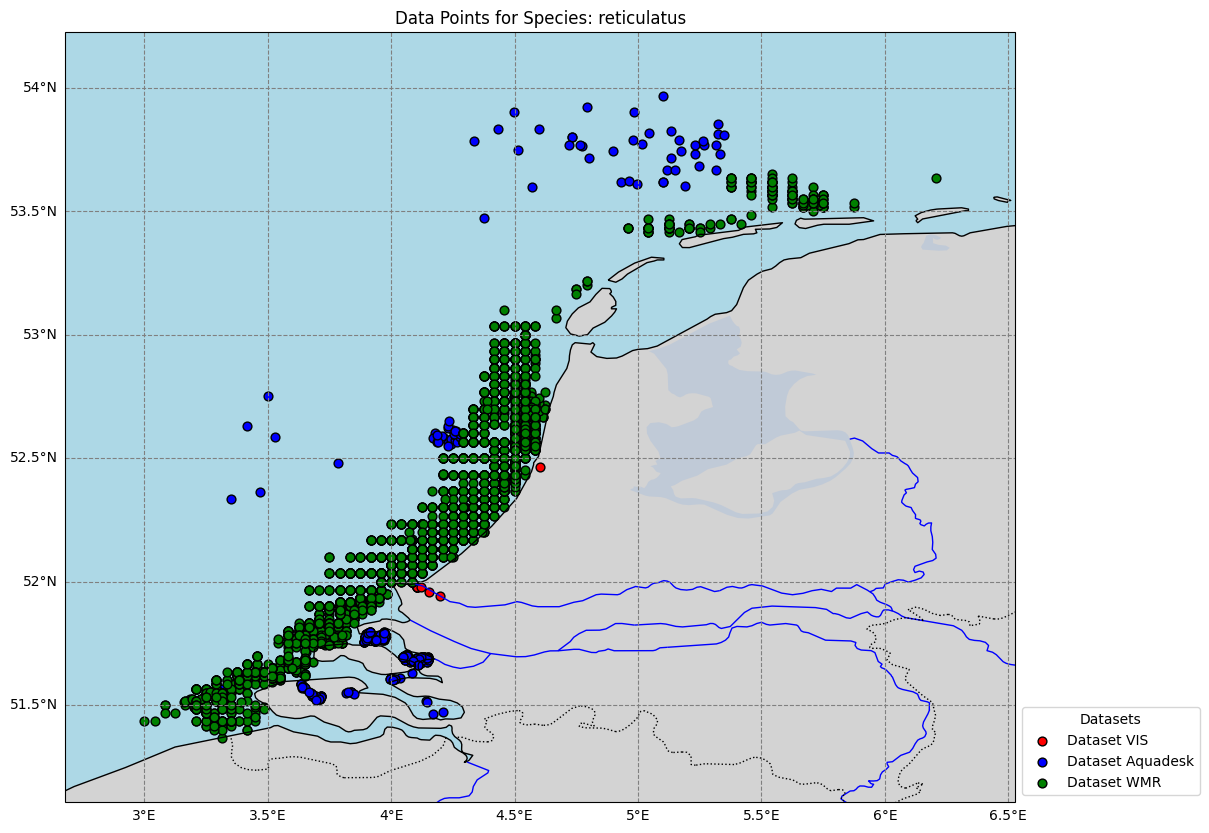

In [31]:
# Combine datasets
df_VIS['dataset_id'] = 'Dataset VIS'
df_Aquadesk_noordzee['dataset_id'] = 'Dataset Aquadesk'
df_WMR['dataset_id'] = 'Dataset WMR'

combined_df = pd.concat([df_WMR, df_Aquadesk_noordzee, df_VIS], ignore_index=True)

# Select a species to plot
plot_species_map('reticulatus')

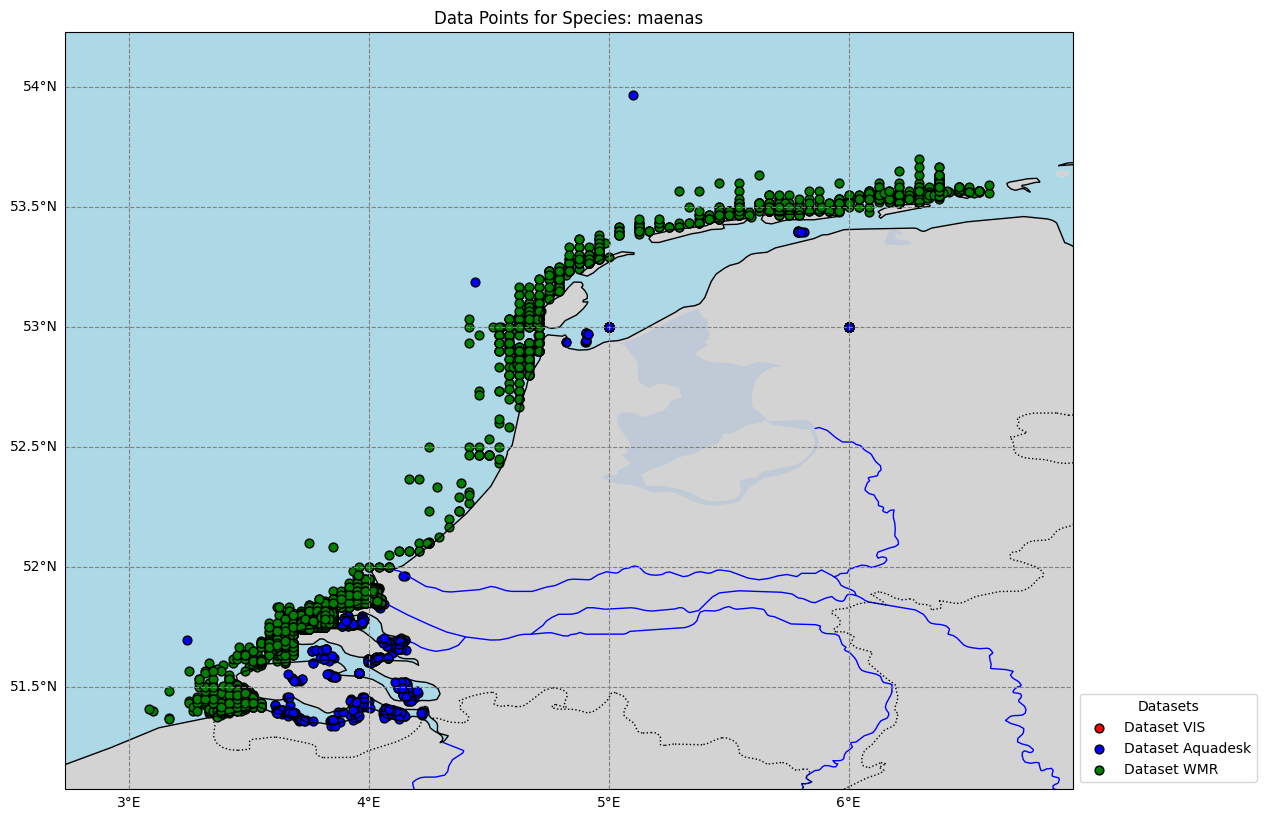

In [32]:
# Select a species to plot
plot_species_map('maenas')

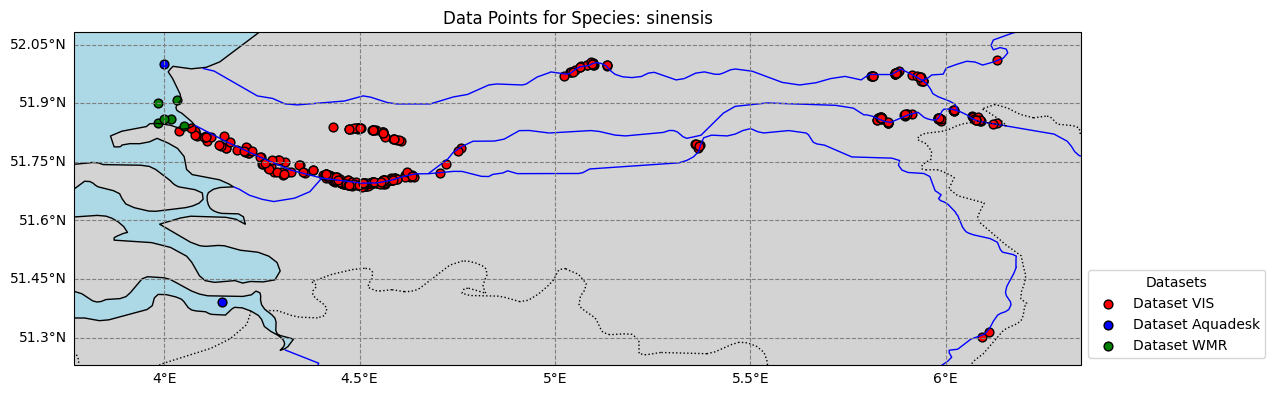

In [33]:
# Select a species to plot
plot_species_map('sinensis')

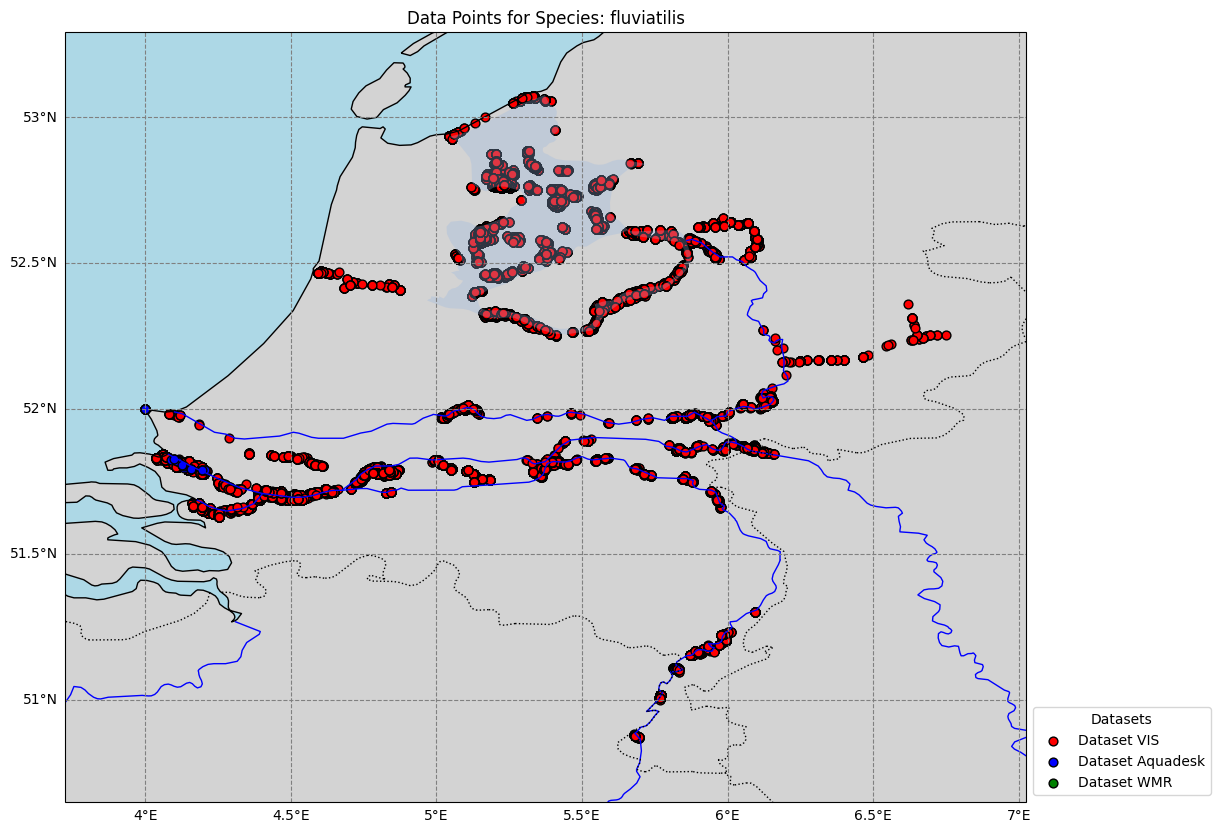

In [34]:
# Select a species to plot
plot_species_map('fluviatilis')